In [ ]:
import tensorflow as tf

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-04-17 03:13:26--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.19MB/s    in 38s     

2021-04-17 03:14:05 (8.07 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
pip install split-folders

In [ ]:
import splitfolders

base_dir = '/tmp/rockpaperscissors/rps-cv-images'
splitfolders.ratio(base_dir, output = "/tmp/rockpaperscissors", seed = 1337, ratio = (.6, .4))

Copying files: 2188 files [00:00, 3999.43 files/s]


In [ ]:
train_dir = os.path.join('/tmp/rockpaperscissors', 'train')
validation_dir = os.path.join('/tmp/rockpaperscissors', 'val')

rock_dir = os.path.join(base_dir, 'rock')
scissors_dir = os.path.join(base_dir, 'scissors')
paper_dir = os.path.join(base_dir, 'paper')

In [ ]:
from sklearn.model_selection import train_test_split

train_rock, val_rock = train_test_split(os.listdir (rock_dir), test_size = 0.4)
train_paper, val_paper = train_test_split(os.listdir (paper_dir), test_size = 0.4)
train_scissors, val_scissors = train_test_split(os.listdir (scissors_dir), test_size = 0.4)

In [ ]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        class_mode='categorical')

Found 1749 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      verbose = 2
      )


Epoch 1/20
25/25 - 41s - loss: 0.0279 - accuracy: 0.9911 - val_loss: 0.1120 - val_accuracy: 0.9688
Epoch 2/20
25/25 - 41s - loss: 0.0253 - accuracy: 0.9899 - val_loss: 0.0580 - val_accuracy: 0.9875
Epoch 3/20
25/25 - 41s - loss: 0.0525 - accuracy: 0.9810 - val_loss: 0.0819 - val_accuracy: 0.9812
Epoch 4/20
25/25 - 41s - loss: 0.0169 - accuracy: 0.9962 - val_loss: 0.1366 - val_accuracy: 0.9750
Epoch 5/20
25/25 - 41s - loss: 0.0274 - accuracy: 0.9887 - val_loss: 0.0607 - val_accuracy: 0.9812
Epoch 6/20
25/25 - 41s - loss: 0.0247 - accuracy: 0.9873 - val_loss: 0.2660 - val_accuracy: 0.9500
Epoch 7/20
25/25 - 41s - loss: 0.0437 - accuracy: 0.9862 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 8/20
25/25 - 41s - loss: 0.0495 - accuracy: 0.9810 - val_loss: 0.0864 - val_accuracy: 0.9875
Epoch 9/20
25/25 - 41s - loss: 0.0261 - accuracy: 0.9886 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 10/20
25/25 - 41s - loss: 0.0115 - accuracy: 0.9949 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 11/

Saving hand-2704013_1280.webp to hand-2704013_1280 (1).webp
hand-2704013_1280.webp
1
rock


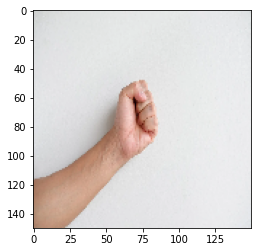

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
pred_indices = train_generator.class_indices
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  predict = np.argmax(classes)
  
  print(fn)
  print(predict)
  for key, value in pred_indices.items():
    if value == predict:
      print(key)